In [1]:
from utils.load_results import *
from utils.plot_helpers import *

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#datasets = ['(3,4)', '(3,8)', '(3,16)', '(4,4)', '(4,8)', '(5,4)']
#n_values = [4, 8, 16, 4, 8, 4]
#n_attributes = [3, 3, 3, 4, 4, 5]
#n_epochs = 300
#n_datasets = len(datasets)
#paths = ['results/' + d + '_sample_scaling_10_balanced_False_vsf_3/' for d in datasets]
datasets = ['(3,4)', '(3,8)', '(4,4)', '(5,4)']
n_values = [4, 8, 4, 4]
n_attributes = [3, 3, 4, 5]
n_epochs = 100
n_datasets = len(datasets)
paths = ['results/' + d + '_game_size_10_vsf_3' for d in datasets]

## training

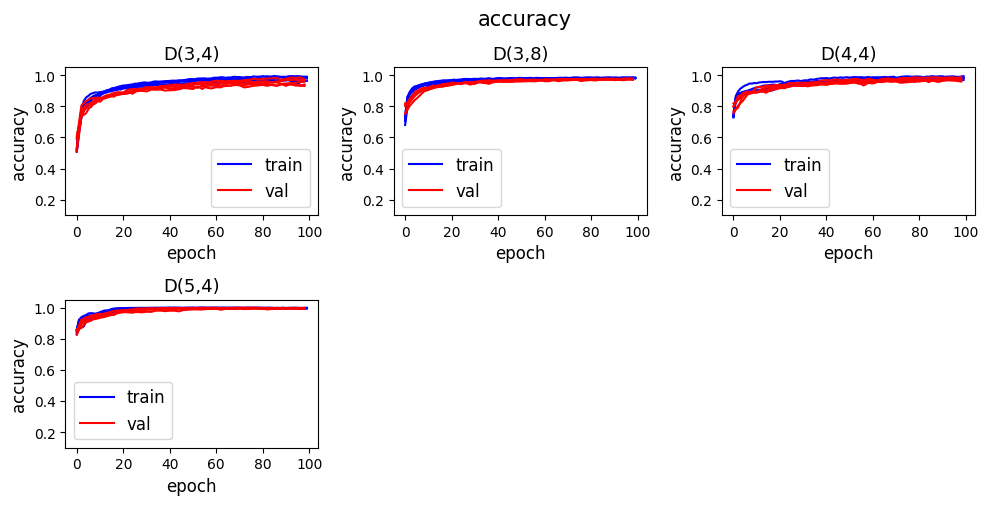

In [3]:
all_accuracies = load_accuracies(paths, n_runs=5, n_epochs=100, val_steps=10, zero_shot=False)
plot_training_trajectory(all_accuracies['train_acc'], all_accuracies['val_acc'], ylim=(0.1, 1.05), steps=(1, 2), 
                         n_epochs=100, titles=('D(3,4)', 'D(3,8)', 'D(4,4)', 'D(5,4)'), plot_indices=(1, 2, 3, 4))

## final accuracies 

In [4]:
#all_accuracies = load_accuracies(paths)
#accuracies = [all_accuracies['train_acc'], all_accuracies['val_acc'], 
#              all_accuracies['zs_acc_objects'], all_accuracies['zs_acc_abstraction']]
accuracies = [all_accuracies['train_acc'], all_accuracies['val_acc']]

In [5]:
# get accuracy means and sds for table representation
final_accuracies_train = {}
for i, d in enumerate(datasets):
    gather_accuracies = []
    for run in range(5):
        gather_accuracies.append(all_accuracies['train_acc'][i][run][-1])
    final_accuracies_train[d] = (round(np.mean(gather_accuracies), 3), round(np.std(gather_accuracies), 3))
final_accuracies_train

{'(3,4)': (0.978, 0.011),
 '(3,8)': (0.982, 0.002),
 '(4,4)': (0.981, 0.008),
 '(5,4)': (0.997, 0.001)}

In [6]:
final_accuracies_val = {}
for i, d in enumerate(datasets):
    gather_accuracies = []
    for run in range(5):
        gather_accuracies.append(all_accuracies['val_acc'][i][run][-1])
    final_accuracies_val[d] = (round(np.mean(gather_accuracies), 3), round(np.std(gather_accuracies), 3))
final_accuracies_val

{'(3,4)': (0.955, 0.016),
 '(3,8)': (0.974, 0.003),
 '(4,4)': (0.974, 0.01),
 '(5,4)': (0.997, 0.002)}

In [7]:
#plot_heatmap(accuracies, 'mean', plot_dims=(1, 2), ylims=(0.4, 1.0), figsize=(13, 3.5), suptitle='accuracies', 
#             fontsize=17, titles=('train', 'validation'), matrix_indices=((0,0), (0,1), (1,0), (1,1)))

## entropy scores 

In [8]:
entropy_scores = load_entropies(paths)
entropies = [entropy_scores['NI'], entropy_scores['effectiveness'], entropy_scores['consistency']]

/Users/kkobrock/Projects/phdproject1/emergent-abstractions/utils/load_results.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result_dict[key] = np.array(result_dict[key])


In [9]:
entropy_dict = {}
for i, score in enumerate(list(entropy_scores.keys())[:3]):
    results = entropies[i]
    print(results)
    mean = np.nanmean(results, axis=-1)
    sd = np.std(results, axis=-1)
    for idx, d in enumerate(datasets):
        entropy_dict[d + score] = (round(mean[idx], 3), round(sd[idx], 3))
entropy_dict


[[0.789591   0.81550021 0.80205288 0.80251543 0.76737533]
 [0.85735898 0.86846333 0.85664409 0.86332121 0.8421763 ]
 [0.79357417 0.85202204 0.82091602 0.8183005  0.82335119]
 [0.86792909 0.85016998 0.90143942 0.88461127 0.90318206]]
[[0.8294824  0.87376029 0.88438421 0.79983928 0.7567907 ]
 [0.89241065 0.87851836 0.85056243 0.89818587 0.87884504]
 [0.84955435 0.93495113 0.88805141 0.85296453 0.83570564]
 [0.92348653 0.9163007  0.94375271 0.93649883 0.94679354]]
[[0.75336046 0.76452375 0.73374522 0.80520955 0.77826024]
 [0.82495672 0.85863586 0.86281334 0.83106208 0.80844491]
 [0.74451538 0.7826058  0.76321786 0.7863439  0.8113567 ]
 [0.81867704 0.79294222 0.86275756 0.83817162 0.86341136]]


{'(3,4)NI': (0.795, 0.016),
 '(3,8)NI': (0.858, 0.009),
 '(4,4)NI': (0.822, 0.019),
 '(5,4)NI': (0.881, 0.02),
 '(3,4)effectiveness': (0.829, 0.047),
 '(3,8)effectiveness': (0.88, 0.016),
 '(4,4)effectiveness': (0.872, 0.036),
 '(5,4)effectiveness': (0.933, 0.012),
 '(3,4)consistency': (0.767, 0.024),
 '(3,8)consistency': (0.837, 0.021),
 '(4,4)consistency': (0.778, 0.023),
 '(5,4)consistency': (0.835, 0.027)}

In [12]:
# from generic to specific
entropies_hierarchical = [entropy_scores['NI_hierarchical'], entropy_scores['effectiveness_hierarchical'], entropy_scores['consistency_hierarchical']]
entropy_dict_hierarchical = {}
for i, score in enumerate(list(entropy_scores.keys())[3:]):
    results = entropies_hierarchical[i]
    mean = np.mean(results, axis=-1)
    #sd = results.std(axis=-1)
    for idx, d in enumerate(datasets):
        entropy_dict_hierarchical[d + score] = mean[idx] #(mean[idx], sd[idx])
entropy_dict_hierarchical


{'(3,4)NI_hierarchical': array([0.90628022, 0.83698138, 0.78945288]),
 '(3,8)NI_hierarchical': array([0.88957727, 0.88531815, 0.85047223]),
 '(4,4)NI_hierarchical': array([0.86422678, 0.86788389, 0.84065547, 0.81774669]),
 '(5,4)NI_hierarchical': array([0.90987164, 0.91638262, 0.91289428, 0.89746708, 0.87563586]),
 '(3,4)effectiveness_hierarchical': array([0.95847893, 0.89628125, 0.87392221]),
 '(3,8)effectiveness_hierarchical': array([0.9469684 , 0.92330738, 0.88348535]),
 '(4,4)effectiveness_hierarchical': array([0.96781358, 0.95244635, 0.92735647, 0.91375782]),
 '(5,4)effectiveness_hierarchical': array([0.99644801, 0.99262917, 0.9879844 , 0.97740742, 0.97084367]),
 '(3,4)consistency_hierarchical': array([0.86471751, 0.78715945, 0.72214916]),
 '(3,8)consistency_hierarchical': array([0.83984161, 0.85130683, 0.82051409]),
 '(4,4)consistency_hierarchical': array([0.78352682, 0.79845445, 0.76957865, 0.74089181]),
 '(5,4)consistency_hierarchical': array([0.83768949, 0.85121828, 0.84874705

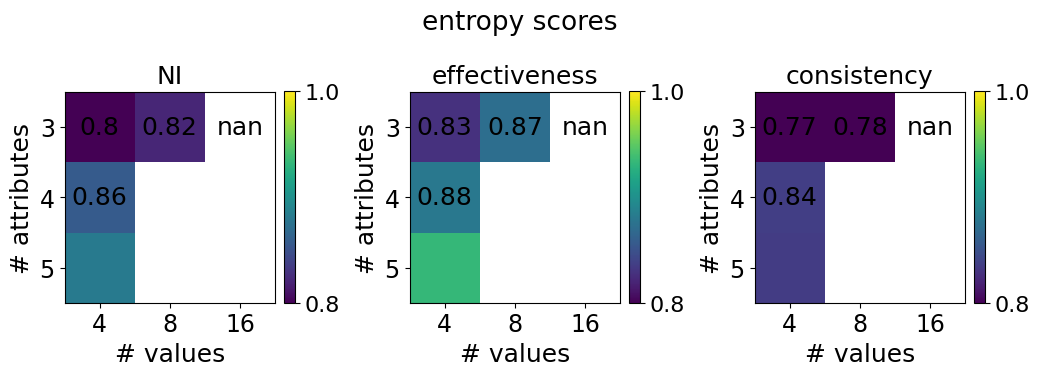

In [81]:
#plot_heatmap(entropies, 'mean', plot_dims=(1,3), ylims=(0.8, 1.0), figsize=(10.5, 3.5), 
#             titles = ('NI', 'effectiveness', 'consistency'), suptitle='entropy scores')
plot_heatmap(entropies, 'mean', plot_dims=(1,3), ylims=(0.8, 1.0), figsize=(10.5, 3.5), 
             titles = ('NI', 'effectiveness', 'consistency'), suptitle='entropy scores',
             matrix_indices=((0,0),(1,0),(0,1),(2,0)))

In [13]:
data_list, run_list, level_list = [], [], []
NMI_hierarchical, effectiveness_hierarchical, consistency_hierarchical = [], [], []

for d, data in enumerate(datasets):
    for run in range(5):
        
        scores = pickle.load(open(paths[d] + '/standard/' + str(run) + '/entropy_scores.pkl', 'rb'))
        
        for l, level in enumerate([1, 2, 3, 4, 5]):  
            
            data_list.append(data)
            run_list.append(run)
            level_list.append(level)
            
            try: 
                NMI_hierarchical.append(scores['normalized_mutual_info_hierarchical'][l])
                effectiveness_hierarchical.append(scores['effectiveness_hierarchical'][l])
                consistency_hierarchical.append(scores['consistency_hierarchical'][l])
            except: 
                NMI_hierarchical.append(np.nan)
                effectiveness_hierarchical.append(np.nan)
                consistency_hierarchical.append(np.nan)

entropy_dict_hierarchical = {'data': data_list, 'level': level_list, 'run': run_list, 'NI': NMI_hierarchical, 
                             'effectiveness': effectiveness_hierarchical, 'consistency': consistency_hierarchical}


In [51]:
pd.Series(entropy_dict_hierarchical['consistency'])

0     0.804167
1     0.770472
2     0.707964
3          NaN
4          NaN
        ...   
95    0.864222
96    0.875527
97    0.880828
98    0.858678
99    0.827922
Length: 100, dtype: float64

In [79]:
all_hierarchical = {}
all_hierarchical['metric'] = ['NI'] * 100 + ['effectiveness'] * 100 + ['consistency'] * 100 # change to 150 if all datasets
all_hierarchical['value'] = (entropy_dict_hierarchical['NI'] + 
                             entropy_dict_hierarchical['effectiveness'] + 
                             entropy_dict_hierarchical['consistency'])
all_hierarchical['level'] = entropy_dict_hierarchical['level'] * 3

In [27]:
df = sns.load_dataset("penguins")

<class 'pandas.core.series.Series'>


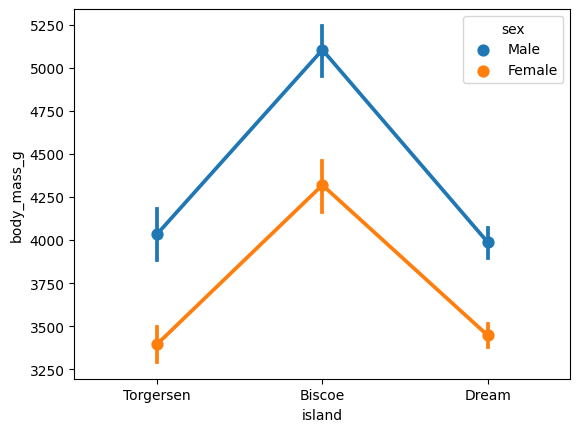

In [36]:
sns.pointplot(data=df, x="island", y="body_mass_g", hue="sex")
print(type(df['sex']))

/Users/kkobrock/opt/miniconda3/envs/egg/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/kkobrock/opt/miniconda3/envs/egg/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/kkobrock/opt/miniconda3/envs/egg/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


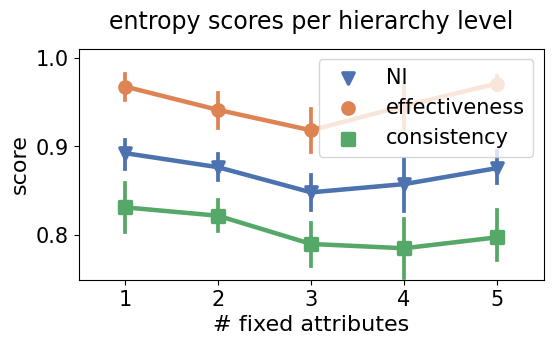

In [82]:
plt.figure(figsize=(6,3))
ax = sns.pointplot(x='level', y='value', data=all_hierarchical, hue='metric', 
                   markers=['v', 'o', 's'], palette='deep', scale=1.2)
plt.ylabel('score', fontsize=16)
plt.title('entropy scores per hierarchy level', fontsize=17, y=1.05)
plt.ylim([0.75,1.01])
plt.xticks(ticks=[0,1,2,3,4], labels=[1,2,3,4,5])
plt.yticks(ticks=[0.8, 0.9, 1.0], fontsize=15)
plt.xlabel('# fixed attributes', fontsize=16)
plt.xticks(fontsize=15)
plt.legend(fontsize=15)
plt.show()

## message length and symbol redundancy

In [ ]:
ml_dict = {'level': [], 'data set': [], 'run': [], 'message length': []}
for d, dataset in enumerate(datasets): 
    for run in range(5):
        
        # if evaluated after training from interaction this is an array showing the message length
        # per level of concreteness (most abstract --> most concrete)
        ml_hierarchical = pickle.load(open(paths[d] + 'standard/' + str(run) + 
                                           '/message_length_hierarchical.pkl', 'rb'))
        
        # if evaluated with the callback throughout training, you get an array for each epoch
        if isinstance(ml_hierarchical, dict): 
            ml_hierarchical = ml_hierarchical['message_length_train'][n_epochs]
            
        for level in range(5):
            
            ml_dict['level'].append(level)
            ml_dict['run'].append(run)
            ml_dict['data set'].append(dataset)
            try: 
                ml_dict['message length'].append(ml_hierarchical[level])
            except: 
                ml_dict['message length'].append(np.NaN)

In [ ]:
plt.figure(figsize=(5,3))
sns.boxplot(x='level', y='message length', data=ml_dict, color='gray')
plt.xticks(fontsize=15)
plt.yticks(ticks=[1,2,3,4,5], labels=[1,2,3,4,5], fontsize=15)
plt.xlabel('# relevant attributes', fontsize=16)
plt.ylabel('# symbols', fontsize=16)
plt.title('message length', fontsize=17, y=1.05)
plt.show()

In [ ]:
symbol_redundancy_dict = {'level': [], 'data set': [], 'run': [], 'symbol frequency': []}

for d, dataset in enumerate(datasets): 
    for run in range(5):
        
        scores = pickle.load(open(paths[d] + 'standard/' + str(run) + '/symbol_redundancy.pkl', 'rb'))
            
        for level in range(5):
            
            symbol_redundancy_dict['level'].append(level)
            symbol_redundancy_dict['run'].append(run)
            symbol_redundancy_dict['data set'].append(dataset)
            try: 
                symbol_redundancy_dict['symbol frequency'].append(scores['symbol_redundancy'][level])
            except: 
                symbol_redundancy_dict['symbol frequency'].append(np.NaN)

In [ ]:
plt.figure(figsize=(5,3))
sns.boxplot(x='level', y='symbol frequency', data=symbol_redundancy_dict, color='gray')
plt.xticks(ticks=[0,1,2,3,4], labels=[1,2,3,4,5], fontsize=15)
plt.yticks(ticks=[0, 1, 2], fontsize=15)
plt.xlabel('# relevant attributes', fontsize=16)
plt.ylabel('occurrences', fontsize=16)
plt.title('symbol redundancy', fontsize=17, y=1.05)
plt.show()

## compositionality

In [87]:
topsim, posdis, bosdis = np.zeros((n_datasets, 5)), np.zeros((n_datasets, 5)), np.zeros((n_datasets, 5))
topsim_specific, posdis_specific, bosdis_specific = np.zeros((n_datasets, 5)), np.zeros((n_datasets, 5)), np.zeros((n_datasets, 5))

for d, dataset in enumerate(datasets): 
    for run in range(5):
        
        topsim_score = pickle.load(open(paths[d] + '/standard/' + str(run) + '/topsim_final.pkl', 'rb'))
        disent_score = pickle.load(open(paths[d] + '/standard/' + str(run) + '/posdis_bosdis.pkl', 'rb'))
        topsim[d, run] = topsim_score['topsim_train']
        posdis[d, run] = disent_score['posdis']
        bosdis[d, run] = disent_score['bosdis']
        topsim_specific[d, run] = topsim_score['topsim_specific_train']
        posdis_specific[d, run] = disent_score['posdis_specific']
        bosdis_specific[d, run] = disent_score['bosdis_specific']

In [88]:
for i, d in enumerate(datasets):
    print(d, "topsim", round(np.mean(topsim[i]), 3))

(3,4) topsim 0.363
(3,8) topsim 0.241
(4,4) topsim 0.336
(5,4) topsim 0.463


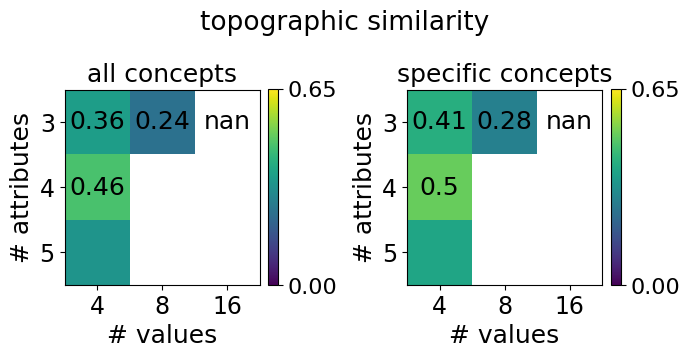

In [93]:
plot_heatmap([topsim, topsim_specific], 'mean', plot_dims=(1,2), ylims=[0.0,0.65], figsize=(7,3.5), 
             titles=['all concepts', 'specific concepts'], suptitle='topographic similarity', suptitle_position=1.,
             matrix_indices=((0, 0), (0, 1), (2, 0), (1, 0)))

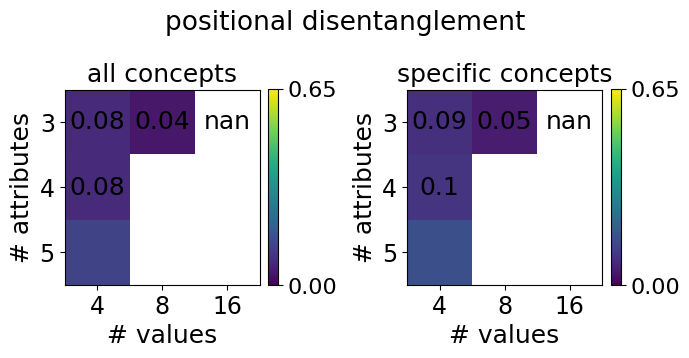

In [91]:
plot_heatmap([posdis, posdis_specific], 'mean', plot_dims=(1,2), ylims=[0.0,0.65], figsize=(7,3.5),
             titles=['all concepts', 'specific concepts'], suptitle='positional disentanglement', suptitle_position=1.,
             matrix_indices=((0, 0), (0, 1), (1, 0), (2, 0)))

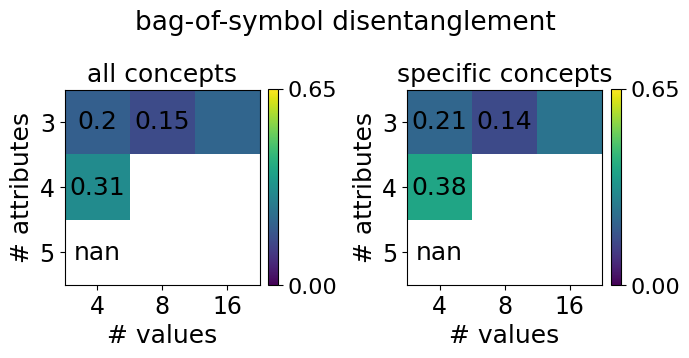

In [70]:
plot_heatmap([bosdis, bosdis_specific], 'mean', plot_dims=(1,2), ylims=[0.0,0.65], figsize=(7,3.5),
             titles=['all concepts', 'specific concepts'], suptitle='bag-of-symbol disentanglement', suptitle_position=1.,
             matrix_indices=((0, 0), (0, 1), (0, 2), (1, 0)))

In [71]:
# compositionality scores for each data set

compositionality_scores = {'dataset':[], 'run':[], 'metric':[], 'data':[], 'score':[]}

for d, dataset in enumerate(datasets): 
    for run in range(5):
        
        topsim = pickle.load(open(paths[d] + '/standard/' + str(run) + '/topsim_final.pkl', 'rb'))
        disent = pickle.load(open(paths[d] + '/standard/' + str(run) + '/posdis_bosdis.pkl', 'rb'))
        
        for metric in ['topsim', 'posdis', 'bosdis']:
            #for data in ['all', 'concrete']: 
            for data in ['all']:
                
                compositionality_scores['dataset'].append(dataset)
                compositionality_scores['run'].append(run)
                compositionality_scores['metric'].append(metric)
                compositionality_scores['data'].append(data)
                
                append = '' if data == 'all' else '_max_relevance'
                    
                if metric == 'topsim':
                    compositionality_scores['score'].append(topsim['topsim' + append + '_train'])
                if metric == 'posdis':
                    compositionality_scores['score'].append(disent['posdis' + append])
                if metric == 'bosdis':
                    compositionality_scores['score'].append(disent['bosdis' + append])

compositionality_scores = pd.DataFrame(compositionality_scores)

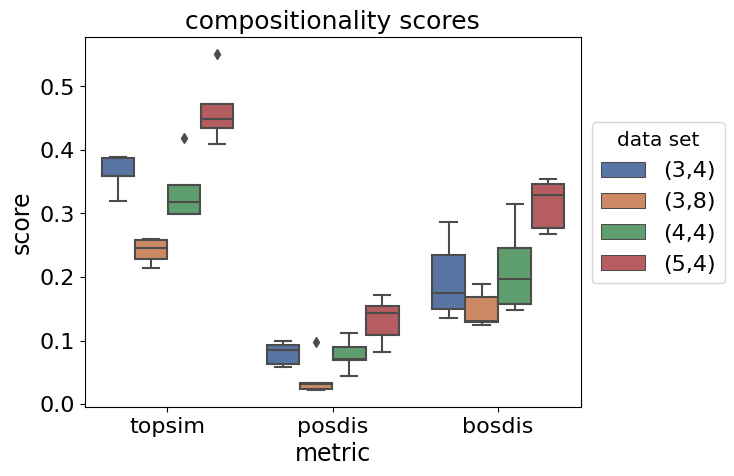

In [72]:
sns.boxplot(x='metric', y='score', data=compositionality_scores[compositionality_scores.data=='all'], 
            hue='dataset', palette='deep')
plt.xlabel(xlabel='metric', fontsize=17)
plt.ylabel(ylabel='score', fontsize=17)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
legend = plt.legend(fontsize=16, title='data set', bbox_to_anchor=(1., 0.8))
plt.setp(legend.get_title(),fontsize='x-large')
plt.title('compositionality scores', fontsize=18)
plt.show()

In [ ]:
# compositionality scores for different vocab size factors 

compositionality_scores = {'vs factor':[], 'run':[], 'metric':[], 'score':[]}

for vsf in [1, 2, 3, 4]: 
    for run in range(5):
        
        path = 'results/(4,8)_sample_scaling_10_balanced_False_vsf_' + str(vsf) + '/'
        
        topsim = pickle.load(open(path + 'standard/' + str(run) + '/topsim_final.pkl', 'rb'))
        disent = pickle.load(open(path + 'standard/' + str(run) + '/posdis_bosdis.pkl', 'rb'))
        
        for metric in ['topsim', 'posdis', 'bosdis']:
                
                compositionality_scores['vs factor'].append(vsf)
                compositionality_scores['run'].append(run)
                compositionality_scores['metric'].append(metric)

                if metric == 'topsim':
                    compositionality_scores['score'].append(topsim['topsim_train'])
                if metric == 'posdis':
                    compositionality_scores['score'].append(disent['posdis'])
                if metric == 'bosdis':
                    compositionality_scores['score'].append(disent['bosdis'])

compositionality_scores = pd.DataFrame(compositionality_scores)

## co-occurrences

In [ ]:
full_plot = False

fig = plt.figure(figsize=(12,3))

for d, dim in enumerate(datasets): 
    
    data = datasets[d]
    path = paths[d]
    vs_factor = int(path[-2])
    vocab_size = (n_values[d] + 1) * vs_factor + 1
    colors = plt.cm.jet(np.linspace(0,1,vocab_size))
    
    average_cooccurences = []
    
    plt.subplot(1,6,d+1)
    
    for run in range(5):
        
        cooccurences = pickle.load(open(paths[d] + 'standard/' + str(run) + '/normalized_cooccurrence.pkl', 'rb'))
        indices = np.flip(np.argsort(cooccurences[:,-1]))
        cooccurences = cooccurences[indices]
        average_cooccurences.append(cooccurences)
        
    average_cooccurences = np.flip(np.mean(average_cooccurences, axis=0), axis=1)
    
    data_dict = {}
    data_dict['symbol rank'] = []
    data_dict['level'] = []
    data_dict['value'] = []
    for symbol in indices:
        for level in range(average_cooccurences.shape[1]):
            data_dict['symbol rank'].append(symbol+1)
            data_dict['level'].append(level)
            data_dict['value'].append(average_cooccurences[symbol, level])
    
    if full_plot:
        g = sns.heatmap(average_cooccurences, cmap='viridis')
        plt.yticks(ticks=[0.5,vocab_size-1.5], labels=[1,vocab_size], fontsize=14)
    else: 
        g = sns.heatmap(average_cooccurences[0:10,:], cmap='viridis')
        plt.yticks(ticks=[0.5,9.5], labels=[1,10], fontsize=14, rotation=0)
    cax = plt.gcf().axes[-1]
    cax.tick_params(labelsize=13)
    for _, spine in g.spines.items():
        spine.set_visible(True)
    #plt.xlabel('# relevant attributes', fontsize=14)
    #plt.ylabel('symbol rank', fontsize=14)
    plt.xticks(ticks=np.arange(n_attributes[d])+0.5, labels=range(1,n_attributes[d]+1), fontsize=14)
    plt.title(data, fontsize=14)
    
    fig.text(0.5, -0.05, '# relevant attributes', ha='center', va='center', fontsize=15, alpha=0.3)
    fig.text(-0.01, 0.5, 'symbol rank', ha='center', va='center', rotation='vertical', fontsize=15, alpha=0.3)

plt.tight_layout()